In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from operator import attrgetter
import datetime as dt
import warnings



# Data for Demographics
dfinfo = pd.read_csv(r'C:\Users\valen\OneDrive\Desktop\Project\Investment\Sample1.csv')

In [15]:
dfinfo.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary


In [16]:
dfinfo

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary
...,...,...,...,...,...,...,...,...
14707,4352347,10/17/2021 15:57,Male,49,Independent,> $ 100 Thousand - 500 Thousand,NaN,Salary
14708,4288026,10/15/2021 12:44,Female,49,Entrepreneur,> $ 100 Thousand - 500 Thousand,NaN,Others
14709,4286882,10/11/2021 10:06,Female,49,Independent,> $ 100 Thousand - 500 Thousand,NaN,Spouse
14710,4396739,10/21/2021 13:42,Male,49,Independent,> $ 100 Thousand - 500 Thousand,NaN,Salary


First Check for missing Values. Although in our case, as the data is already cleaned the missing values of referral_code_used refers customers that doesn't sign up with referral codes thus we need to include this in our analysis

In [17]:
for col in dfinfo.columns:
    pct_missing = np.mean(dfinfo[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

user_id - 0.0%
registration_import_datetime - 0.0%
user_gender - 0.0%
user_age - 0.0%
user_occupation - 0.0%
user_income_range - 0.0%
referral_code_used - 0.6190864600326265%
user_income_source - 0.0%


In [18]:
dfinfo['user_id'].nunique()

14712

In [19]:
dfinfo['user_occupation'].value_counts()

Student                7887
Independent            3263
Others                 1683
Stay At Home            934
Entrepreneur            598
Goverment Officials     191
Teacher                 106
Officers                 45
Retiree                   5
Name: user_occupation, dtype: int64

We bin the customers ages to better segment them and for consistency in Tableau vizualisation later

In [20]:
bins= [0,20,30,40,50,60,100]
labels = ['0-20','21-30','31-40','41-50','51-60','61+']
dfinfo['Age_Group'] = pd.cut(dfinfo['user_age'], bins=bins, labels=labels)


In [21]:
dfinfo.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Age_Group
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary,51-60
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary,41-50
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary,41-50


In [22]:
dfinfo['Age_Group'].value_counts()

21-30    7907
0-20     3069
31-40    2445
41-50     912
51-60     328
61+        51
Name: Age_Group, dtype: int64

User Retention Problem

We can take a part of the Dataframe as we don't need the full information to see the activity of the users. we can check them from the transaction dates to see their activity. 

In [23]:
dfbehaviour = pd.read_csv(r'C:\Users\valen\OneDrive\Desktop\Project\Investment\Sample2.csv')
dfretention = dfbehaviour[['user_id','date']]

In [24]:
dfretention.head()
print("You have {} rows in your data".format(len(dfbehaviour)))

You have 401239 rows in your data


In [25]:
dfretention['user_id'].nunique()

14712

In [26]:
dfretention.dtypes

user_id     int64
date       object
dtype: object

Surprisingly date is an object, thus we need to convert them.

In [27]:
dfretention['date'] = pd.to_datetime(dfretention['date'])

<ipython-input-27-12f25441d1db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfretention['date'] = pd.to_datetime(dfretention['date'])


In [28]:
# Get the first day a user was active
start_date = dfretention.groupby('user_id')['date'].min()
start_date = start_date.rename("start_day")
start_date.head()

user_id
43195   2021-10-06
47757   2021-10-07
50701   2021-08-30
50961   2021-08-31
51883   2021-10-01
Name: start_day, dtype: datetime64[ns]

In [29]:
# We neeed to do a self join of the new columns
dfretention = pd.merge(dfretention, start_date, left_on='user_id', right_on='user_id')
dfretention.head()

,user_id,date,start_day
0,43195,2021-10-06,2021-10-06
1,43195,2021-10-07,2021-10-06
2,43195,2021-10-08,2021-10-06
3,43195,2021-10-11,2021-10-06
4,43195,2021-10-12,2021-10-06


In [30]:
#Then we convert to date and find the last active day of the customers using the groupby and transform
dfretention['start_day'] =  pd.to_datetime(dfretention['start_day'])
dfretention['last_date'] = dfretention.groupby('user_id')['date'].transform('max')

As the transactions are recorded on weekdays, then we need to exclude weekends. We can use numpy busday function for this

In [31]:
dfretention['Active_Days'] = np.busday_count(dfretention['start_day'].values.astype('datetime64[D]'),dfretention['date'].values.astype('datetime64[D]'))
dfretention.head()

,user_id,date,start_day,last_date,Active_Days
0,43195,2021-10-06,2021-10-06,2021-10-29,0
1,43195,2021-10-07,2021-10-06,2021-10-29,1
2,43195,2021-10-08,2021-10-06,2021-10-29,2
3,43195,2021-10-11,2021-10-06,2021-10-29,3
4,43195,2021-10-12,2021-10-06,2021-10-29,4


In [32]:
#Then we can find the total active days by substracting the first and the last active day with the numpy busday method too
dfretention['Total_Days'] = np.busday_count(dfretention['start_day'].values.astype('datetime64[D]'),dfretention['last_date'].values.astype('datetime64[D]'))
dfretention.head()

,user_id,date,start_day,last_date,Active_Days,Total_Days
0,43195,2021-10-06,2021-10-06,2021-10-29,0,17
1,43195,2021-10-07,2021-10-06,2021-10-29,1,17
2,43195,2021-10-08,2021-10-06,2021-10-29,2,17
3,43195,2021-10-11,2021-10-06,2021-10-29,3,17
4,43195,2021-10-12,2021-10-06,2021-10-29,4,17


In [33]:
dfretention[['user_id', 'Active_Days']].head()

,user_id,Active_Days
0,43195,0
1,43195,1
2,43195,2
3,43195,3
4,43195,4


In [34]:
#We can see the daily retention rate by grouping the data with active days and unique user_id
dfretention.groupby('Active_Days')['user_id'].nunique().head(20) / dfretention['user_id'].nunique()

Active_Days
0     1.000000
1     0.981852
2     0.957110
3     0.919318
4     0.902529
5     0.872893
6     0.857667
7     0.857667
8     0.820419
9     0.803902
10    0.790239
11    0.775218
12    0.753670
13    0.716490
14    0.698953
15    0.681960
16    0.664967
17    0.648246
18    0.607055
19    0.591422
Name: user_id, dtype: float64

We can plot a simple graph from this to see the daily retention rate

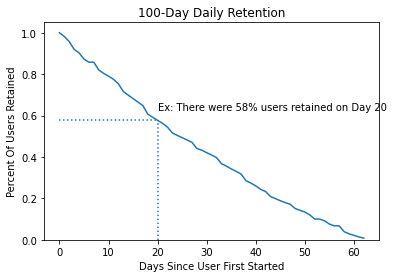

In [35]:
whole_retention = dfretention.groupby('Active_Days')['user_id'].nunique() / dfbehaviour['user_id'].nunique()

plt.plot(whole_retention)
plt.title("100-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)

plt.hlines(y=whole_retention.loc[20], xmin=0, xmax=20, linestyles='dotted')
plt.vlines(x=20, ymin=0, ymax=whole_retention.loc[20], linestyles='dotted')
plt.text(s=("Ex: There were {:.0%} users retained on Day 20".format(whole_retention.loc[20])),
        x=20, y=whole_retention.loc[20] + .05);

As we don't need the whole activity log, we can use the total days column and slicing them with the loc function to get the last day of each customers and getting the total active days for our analysis purposes

In [36]:
dftotalactive = dfretention.loc[(dfretention['Active_Days'] == dfretention['Total_Days'])]
dftotalactive.head()

,user_id,date,start_day,last_date,Active_Days,Total_Days
17,43195,2021-10-29,2021-10-06,2021-10-29,17,17
34,47757,2021-10-29,2021-10-07,2021-10-29,16,16
79,50701,2021-10-29,2021-08-30,2021-10-29,44,44
123,50961,2021-10-29,2021-08-31,2021-10-29,43,43
144,51883,2021-10-29,2021-10-01,2021-10-29,20,20


In [37]:
dftotalactive = dftotalactive.drop(columns=['date','start_day','last_date','Active_Days'])

We can use this final information to sum up each users total activity days for our retention analysis

In [38]:
dftotalactive.head()

,user_id,Total_Days
17,43195,17
34,47757,16
79,50701,44
123,50961,43
144,51883,20


Combining Active and Demographics

In [39]:
dftotalactive.head()

,user_id,Total_Days
17,43195,17
34,47757,16
79,50701,44
123,50961,43
144,51883,20


In [40]:
dffull = pd.merge(left=dfinfo, right=dftotalactive, how='left', left_on='user_id', right_on='user_id')
dffull.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Age_Group,Total_Days
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary,51-60,15
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,12
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary,41-50,4
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,53
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary,41-50,51


In [41]:
dffull.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Age_Group,Total_Days
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary,51-60,15
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,12
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary,41-50,4
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,53
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary,41-50,51


Profit/Loss snd LTV Amount

First, we need to load our dataset and fill the N/A values with 0 for analysis purposes.

In [42]:
dfbehaviour = pd.read_csv(r'C:\Users\valen\OneDrive\Desktop\Project\Investment\Sample2.csv')

In [43]:
dfbehaviour = dfbehaviour.fillna(0)

Then we sum up the profit and loss ratio of customers by substracting AUM and the invested amount. We are also finding the LTV with the formula LTV = 0.01% x AUM per user per day.

In [46]:
dfbehaviour['Stocks_Total'] = dfbehaviour['Stocks_AUM'] - dfbehaviour['Stocks_invested_amount']
dfbehaviour['Derivatives_Total'] = dfbehaviour['Derivatives_AUM'] - dfbehaviour['Derivatives_invested_amount']
dfbehaviour['Obligation_Total'] = dfbehaviour['Obligation_AUM'] - dfbehaviour['Obligation_invested_amount']
dfbehaviour['MixedAssets_Total'] = dfbehaviour['MixedAssets_AUM'] - dfbehaviour['MixedAssets_invested_amount']
dfbehaviour['LTV'] = 0.0001*(dfbehaviour['Stocks_AUM']+dfbehaviour['Derivatives_AUM']+dfbehaviour['Obligation_AUM']+dfbehaviour['MixedAssets_AUM'])

In [47]:
dfbehaviour.head()

,user_id,date,Derivatives_AUM,Derivatives_invested_amount,Stocks_AUM,Stocks_invested_amount,Obligation_AUM,Obligation_invested_amount,MixedAssets_AUM,MixedAssets_invested_amount,Stocks_Total,Derivatives_Total,Obligation_Total,MixedAssets_Total,LTV
0,43195,10/6/2021,50008.0,50000.0,285066.0,280000.0,170072.0,170000.0,0.0,0.0,5066.0,8.0,72.0,0.0,50.5146
1,43195,10/7/2021,50012.0,50000.0,285377.0,280000.0,170200.0,170000.0,0.0,0.0,5377.0,12.0,200.0,0.0,50.5589
2,43195,10/8/2021,50016.0,50000.0,288188.0,280000.0,169983.0,170000.0,0.0,0.0,8188.0,16.0,-17.0,0.0,50.8187
3,43195,10/11/2021,50028.0,50000.0,285988.0,280000.0,169866.0,170000.0,0.0,0.0,5988.0,28.0,-134.0,0.0,50.5882
4,43195,10/12/2021,50032.0,50000.0,285988.0,280000.0,169857.0,170000.0,0.0,0.0,5988.0,32.0,-143.0,0.0,50.5877


We can then drop the AUM columns as if AUM depends on the investment amount. Thus we still need the invested amount columns for our analysis purposes later.

In [48]:
dfbehaviourtotal = dfbehaviour.drop(columns=['Stocks_AUM','Derivatives_AUM','Obligation_AUM','MixedAssets_AUM'])

In [49]:
dfbehaviourtotal.head()

,user_id,date,Derivatives_invested_amount,Stocks_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,Stocks_Total,Derivatives_Total,Obligation_Total,MixedAssets_Total,LTV
0,43195,10/6/2021,50000.0,280000.0,170000.0,0.0,5066.0,8.0,72.0,0.0,50.5146
1,43195,10/7/2021,50000.0,280000.0,170000.0,0.0,5377.0,12.0,200.0,0.0,50.5589
2,43195,10/8/2021,50000.0,280000.0,170000.0,0.0,8188.0,16.0,-17.0,0.0,50.8187
3,43195,10/11/2021,50000.0,280000.0,170000.0,0.0,5988.0,28.0,-134.0,0.0,50.5882
4,43195,10/12/2021,50000.0,280000.0,170000.0,0.0,5988.0,32.0,-143.0,0.0,50.5877


We can find the total profit/loss by summing up all the totals from each investment which we have calculated earlier

In [50]:
dfbehaviourtotal['Total'] = (dfbehaviour['Stocks_Total']+dfbehaviour['Derivatives_Total']+dfbehaviour['Obligation_Total']+dfbehaviour['MixedAssets_Total'])

In [51]:
dfbehaviourtotal.head()

,user_id,date,Derivatives_invested_amount,Stocks_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,Stocks_Total,Derivatives_Total,Obligation_Total,MixedAssets_Total,LTV,Total
0,43195,10/6/2021,50000.0,280000.0,170000.0,0.0,5066.0,8.0,72.0,0.0,50.5146,5146.0
1,43195,10/7/2021,50000.0,280000.0,170000.0,0.0,5377.0,12.0,200.0,0.0,50.5589,5589.0
2,43195,10/8/2021,50000.0,280000.0,170000.0,0.0,8188.0,16.0,-17.0,0.0,50.8187,8187.0
3,43195,10/11/2021,50000.0,280000.0,170000.0,0.0,5988.0,28.0,-134.0,0.0,50.5882,5882.0
4,43195,10/12/2021,50000.0,280000.0,170000.0,0.0,5988.0,32.0,-143.0,0.0,50.5877,5877.0


In [52]:
#We can find the total LTV using the group by function again
dfbehaviourtotal['Total_LTV']=dfbehaviourtotal.groupby('user_id')['LTV'].transform('sum')

For this analysis purposes, we are also looking at the last date the users are active to see their final values

In [53]:
dfbehaviourtotal['last_date'] = dfbehaviourtotal.groupby('user_id')['date'].transform('max')

In [54]:
dfbehaviourtotal.head()

,user_id,date,Derivatives_invested_amount,Stocks_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,Stocks_Total,Derivatives_Total,Obligation_Total,MixedAssets_Total,LTV,Total,Total_LTV,last_date
0,43195,10/6/2021,50000.0,280000.0,170000.0,0.0,5066.0,8.0,72.0,0.0,50.5146,5146.0,914.4883,10/8/2021
1,43195,10/7/2021,50000.0,280000.0,170000.0,0.0,5377.0,12.0,200.0,0.0,50.5589,5589.0,914.4883,10/8/2021
2,43195,10/8/2021,50000.0,280000.0,170000.0,0.0,8188.0,16.0,-17.0,0.0,50.8187,8187.0,914.4883,10/8/2021
3,43195,10/11/2021,50000.0,280000.0,170000.0,0.0,5988.0,28.0,-134.0,0.0,50.5882,5882.0,914.4883,10/8/2021
4,43195,10/12/2021,50000.0,280000.0,170000.0,0.0,5988.0,32.0,-143.0,0.0,50.5877,5877.0,914.4883,10/8/2021


Again, we slice the dataframe to take the last date the users are active

In [55]:
dftotalPL = dfbehaviourtotal.loc[(dfbehaviourtotal['date'] == dfbehaviourtotal['last_date'])]

In [56]:
dftotalPL.head()

,user_id,date,Derivatives_invested_amount,Stocks_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,Stocks_Total,Derivatives_Total,Obligation_Total,MixedAssets_Total,LTV,Total,Total_LTV,last_date
2,43195,10/8/2021,50000.0,280000.0,170000.0,0.0,8188.0,16.0,-17.0,0.0,50.8187,8187.0,914.4883,10/8/2021
19,47757,10/8/2021,0.0,100000.0,5300000.0,0.0,1717.0,0.0,2484.0,0.0,540.4201,4201.0,12767.9880,10/8/2021
43,50701,9/9/2021,0.0,0.0,0.0,10000000.0,0.0,0.0,0.0,-339921.0,966.0079,-339921.0,43864.3998,9/9/2021
87,50961,9/9/2021,100000.0,1700000.0,200000.0,0.0,29691.0,174.0,171.0,0.0,203.0036,30036.0,26625.5250,9/9/2021
129,51883,10/8/2021,20000.0,90000.0,90000.0,0.0,5808.0,8.0,112.0,0.0,20.5928,5928.0,394.2535,10/8/2021


We then drop some columns such as the last date, Profit and Loss totals for each investment to concise our dataframe.

In [57]:
dftotalPLcomp = dftotalPL[['Stocks_invested_amount','Derivatives_invested_amount','Obligation_invested_amount','MixedAssets_invested_amount','user_id','Total_LTV','Total']]

We can also add a new column of total invested amount for our analysis purposes later.

In [58]:
dftotalPLcomp['Total_Invested'] = dftotalPLcomp['Stocks_invested_amount']+dftotalPLcomp['Derivatives_invested_amount']+dftotalPLcomp['Obligation_invested_amount']+dftotalPLcomp['MixedAssets_invested_amount']

<ipython-input-58-fb9616dab7c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftotalPLcomp['Total_Invested'] = dftotalPLcomp['Stocks_invested_amount']+dftotalPLcomp['Derivatives_invested_amount']+dftotalPLcomp['Obligation_invested_amount']+dftotalPLcomp['MixedAssets_invested_amount']


In [59]:
dftotalPLcomp.head()

,Stocks_invested_amount,Derivatives_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,user_id,Total_LTV,Total,Total_Invested
2,280000.0,50000.0,170000.0,0.0,43195,914.4883,8187.0,500000.0
19,100000.0,0.0,5300000.0,0.0,47757,12767.9880,4201.0,5400000.0
43,0.0,0.0,0.0,10000000.0,50701,43864.3998,-339921.0,10000000.0
87,1700000.0,100000.0,200000.0,0.0,50961,26625.5250,30036.0,2000000.0
129,90000.0,20000.0,90000.0,0.0,51883,394.2535,5928.0,200000.0


We can merge this dataframe to our previous data frame we have merged with the demographics. Then we can export to CSV.

In [60]:
dfcomplete = pd.merge(left=dffull, right=dftotalPLcomp, how='left', left_on='user_id', right_on='user_id')
dfcomplete.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Age_Group,Total_Days,Stocks_invested_amount,Derivatives_invested_amount,Obligation_invested_amount,MixedAssets_invested_amount,Total_LTV,Total,Total_Invested
0,162882,9/17/2021 14:10,Female,51,Independent,> $ 500 Thousand - 1 Million,NaN,Salary,51-60,15,1000000.0,0.0,0.0,0.0,5791.9851,7783.0,1000000.0
1,3485491,10/9/2021 11:11,Female,55,Others,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,12,3730000.0,940000.0,5330000.0,0.0,13042.9899,60244.0,10000000.0
2,1071649,10/8/2021 1:27,Male,50,Independent,$ 10 Thousand - 50 Thousand,NaN,Salary,41-50,4,50000.0,10000.0,40000.0,0.0,49.8009,-345.0,100000.0
3,3816789,8/12/2021 7:19,Female,53,Stay At Home,> $ 50 Thousand - 100 Thousand,NaN,Salary,51-60,53,190000.0,40000.0,270000.0,0.0,3073.0842,-957.0,500000.0
4,3802293,8/15/2021 9:31,Female,47,Goverment Officials,> $ 500 Thousand - 1 Million,used referral,Salary,41-50,51,3300000.0,500000.0,1200000.0,0.0,68670.5366,-15782.0,5000000.0


In [61]:
dfcomplete.to_csv('Analyzed_Data.csv',index=False)

In [62]:
dfcomplete['Total_LTV'].describe()

count    1.471200e+04
mean     6.812211e+03
std      8.399056e+04
min      0.000000e+00
25%      2.302795e+01
50%      2.214322e+02
75%      1.176558e+03
max      5.300389e+06
Name: Total_LTV, dtype: float64